***Importaciones***

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## **Generación de puntos 3D**

In [8]:
def generar_puntos():
  x = np.linspace(-2, 2, 5)
  y = np.linspace(-2, 2, 5)
  z = np.linspace(1, 5, 5)
  puntos = np.array([[xi, yi, zi] for xi in x for yi in y for zi in z]).T
  return puntos

puntos = generar_puntos()

## **Proyección Ortogonal**

In [9]:
def proyectar_ortogonal(puntos):
  P = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 1]
  ])
  puntos_hom = np.vstack((puntos, np.ones((1, puntos.shape[1]))))
  proy = P @ puntos_hom
  return proy[:2]

proy_ort = proyectar_ortogonal(puntos)

## **Proyección Perspectiva**

In [10]:
def proyectar_perspectiva(puntos, d=1.0):
  P = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 1/d, 0]
  ])
  puntos_hom = np.vstack((puntos, np.ones((1, puntos.shape[1]))))
  proy = P @ puntos_hom
  proy /= proy[-1, :]
  return proy[:2]

proy_persp = proyectar_perspectiva(puntos, d=2.0)

## **Visualización**

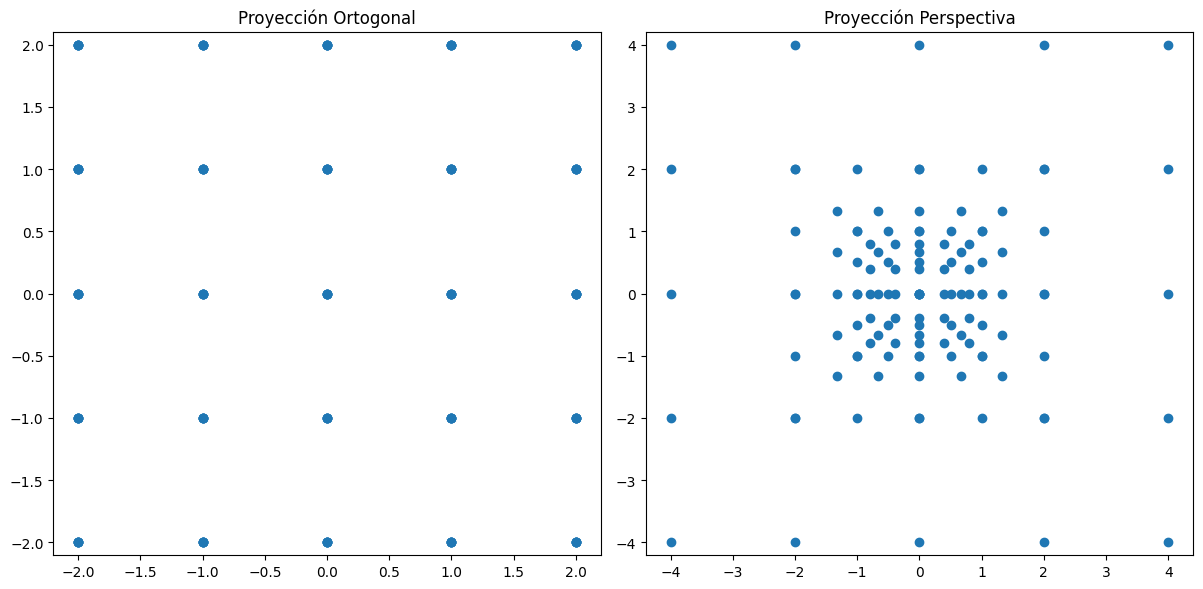

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].scatter(*proy_ort)
axs[0].set_title("Proyección Ortogonal")
axs[0].axis("equal")

axs[1].scatter(*proy_persp)
axs[1].set_title("Proyección Perspectiva")
axs[1].axis("equal")

plt.tight_layout()
plt.show()

## **Comparación con diferentes valores de distancia focal**

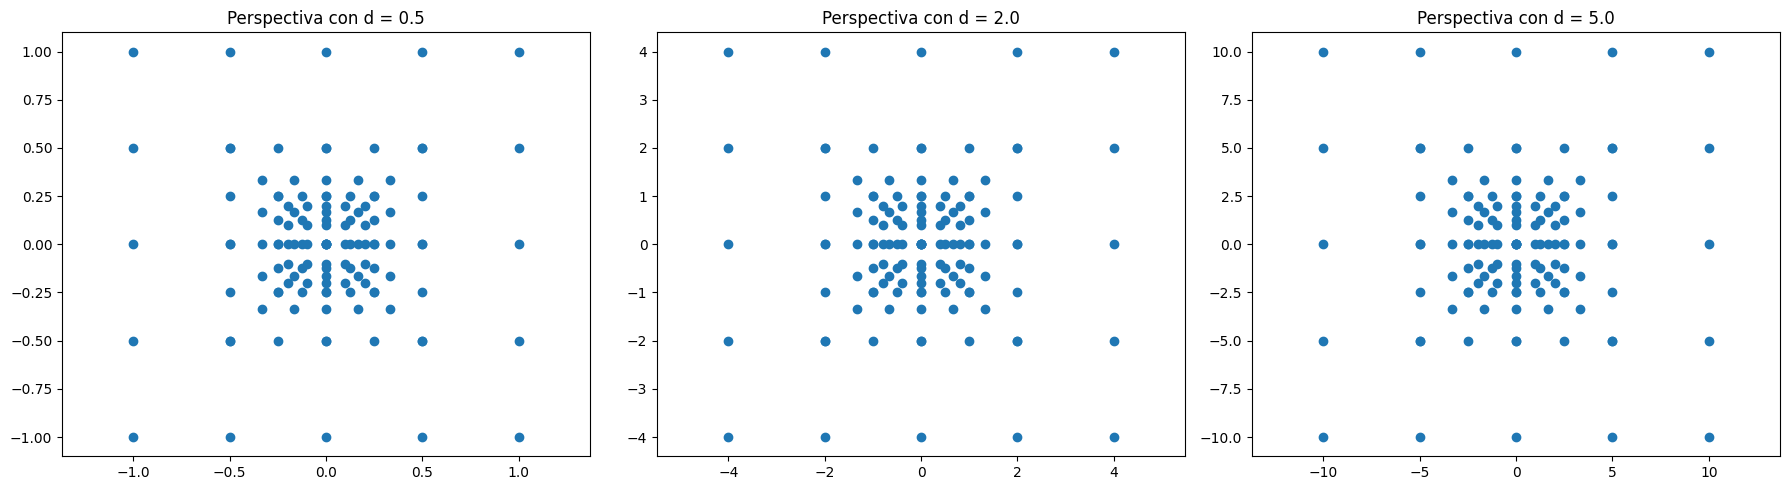

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, d in enumerate([0.5, 2.0, 5.0]):
  proy = proyectar_perspectiva(puntos, d)
  axs[i].scatter(*proy)
  axs[i].set_title(f"Perspectiva con d = {d}")
  axs[i].axis("equal")
plt.tight_layout()
plt.show()